**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
## Load data
gas_turbines = pd.read_csv('C:/Users/soumy/Documents/neural networks/gas_turbines.csv')
gas_turbines.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [3]:
gas_turbines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


**EDA**

In [4]:
gas_turbines.isnull().sum().sum()

0

In [5]:
gas_turbines[gas_turbines.duplicated()]

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX


In [6]:
gas_turbines.nunique()

AT      12086
AP        540
AH      12637
AFDP    11314
GTEP     8234
TIT       706
TAT      2340
TEY      4207
CDP      3611
CO      13096
NOX     11996
dtype: int64

In [7]:
gas_turbines.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

**Observation:**
* No missing values
* No duplicate values
* All dtypes are correct.

**Data Visualisation**

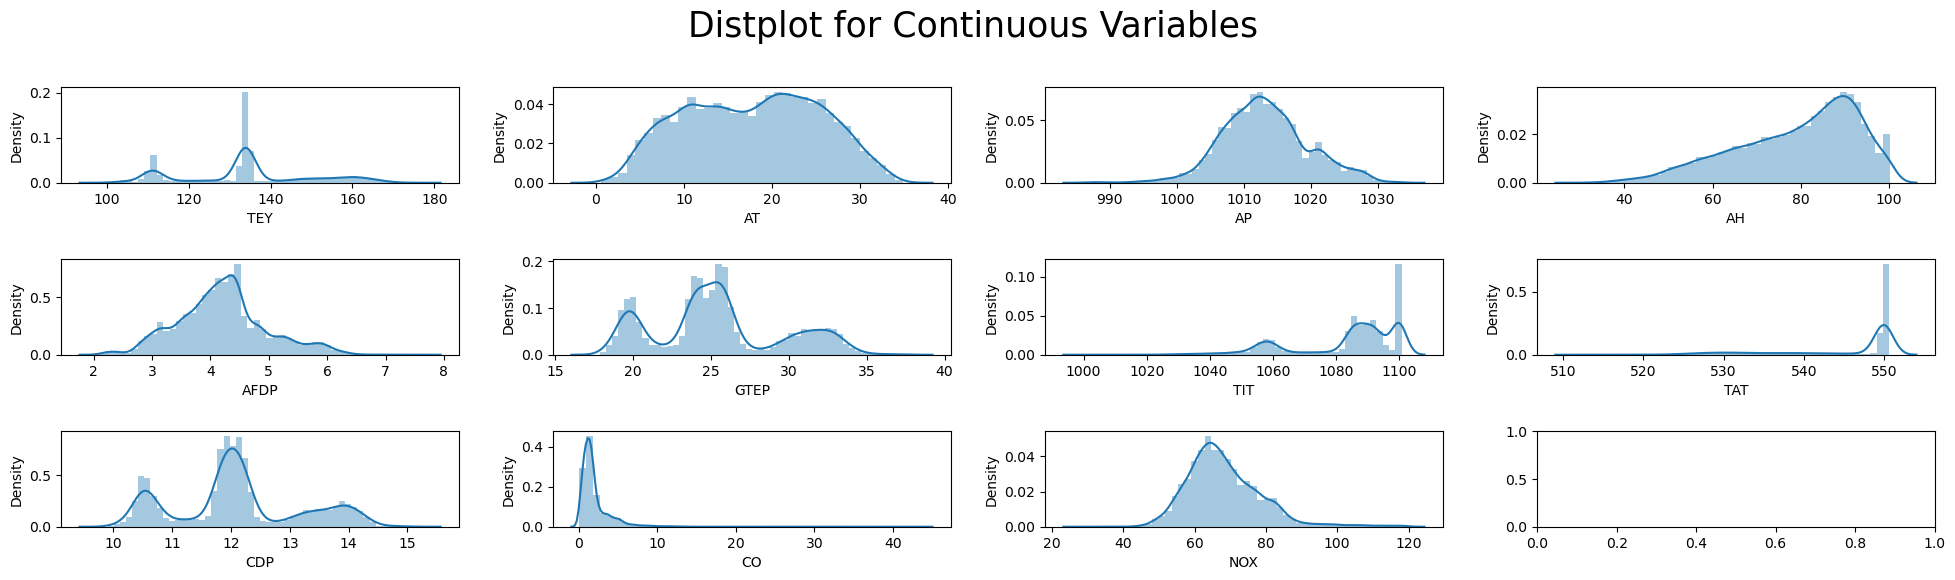

In [8]:
fig, ax = plt.subplots(3,4, figsize=(20,6), sharex= False, sharey = False)
sns.distplot(gas_turbines['TEY'], ax=ax[0,0])
sns.distplot(gas_turbines['AT'], ax=ax[0,1])
sns.distplot(gas_turbines['AP'], ax=ax[0,2])
sns.distplot(gas_turbines['AH'], ax=ax[0,3])
sns.distplot(gas_turbines['AFDP'], ax=ax[1,0])
sns.distplot(gas_turbines['GTEP'], ax=ax[1,1])
sns.distplot(gas_turbines['TIT'], ax=ax[1,2])
sns.distplot(gas_turbines['TAT'], ax=ax[1,3])
sns.distplot(gas_turbines['CDP'], ax=ax[2,0])
sns.distplot(gas_turbines['CO'], ax=ax[2,1])
sns.distplot(gas_turbines['NOX'], ax=ax[2,2])
plt.suptitle("Distplot for Continuous Variables", fontsize= 25)
plt.tight_layout(pad=2.0)

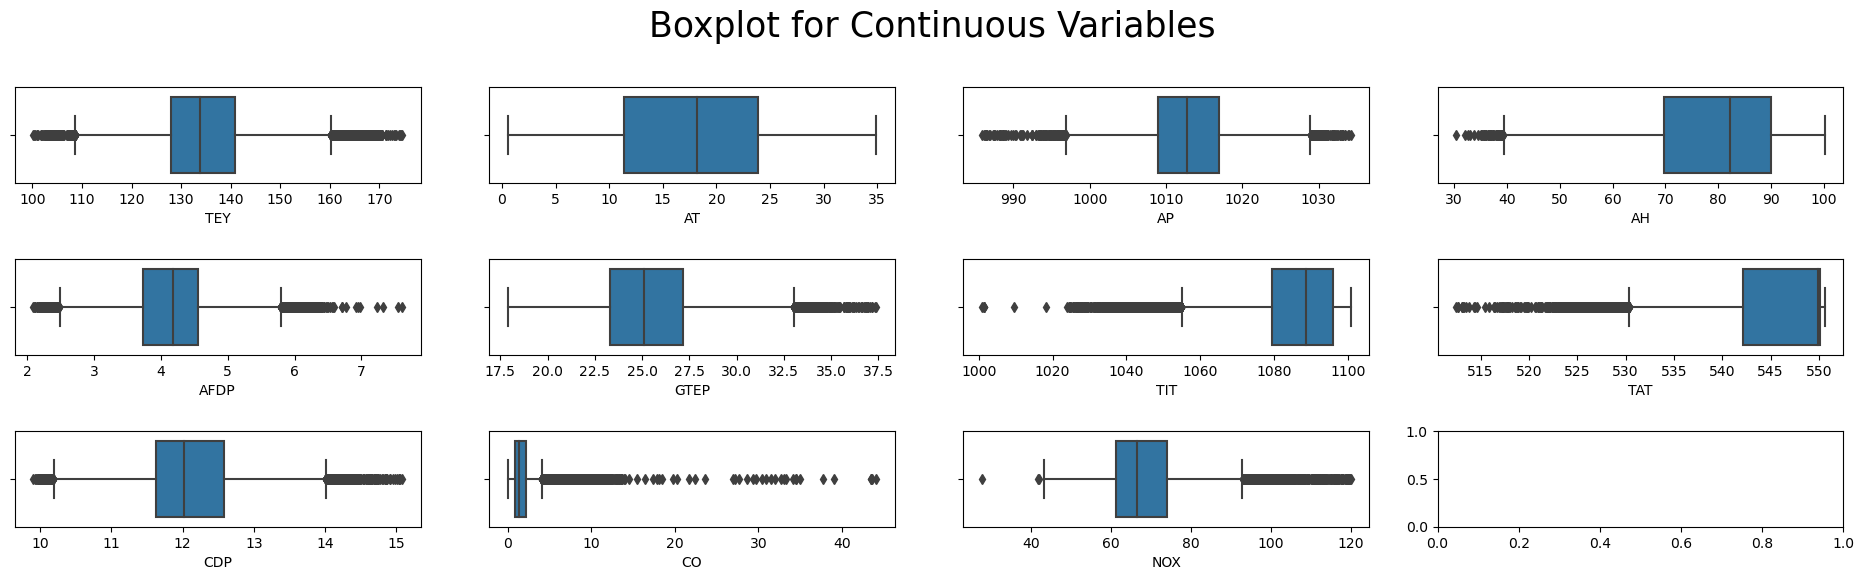

In [9]:
## Check for Outliers
fig, ax = plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(gas_turbines.TEY, ax=ax[0,0])
sns.boxplot(gas_turbines.AT, ax=ax[0,1])
sns.boxplot(gas_turbines.AP, ax=ax[0,2])
sns.boxplot(gas_turbines.AH, ax=ax[0,3])
sns.boxplot(gas_turbines.AFDP, ax=ax[1,0])
sns.boxplot(gas_turbines.GTEP, ax=ax[1,1])
sns.boxplot(gas_turbines.TIT, ax=ax[1,2])
sns.boxplot(gas_turbines.TAT, ax=ax[1,3])
sns.boxplot(gas_turbines.CDP, ax=ax[2,0])
sns.boxplot(gas_turbines.CO, ax=ax[2,1])
sns.boxplot(gas_turbines.NOX, ax=ax[2,2])
plt.suptitle("Boxplot for Continuous Variables", fontsize= 25)
plt.tight_layout(pad=2.0)

We have noise data

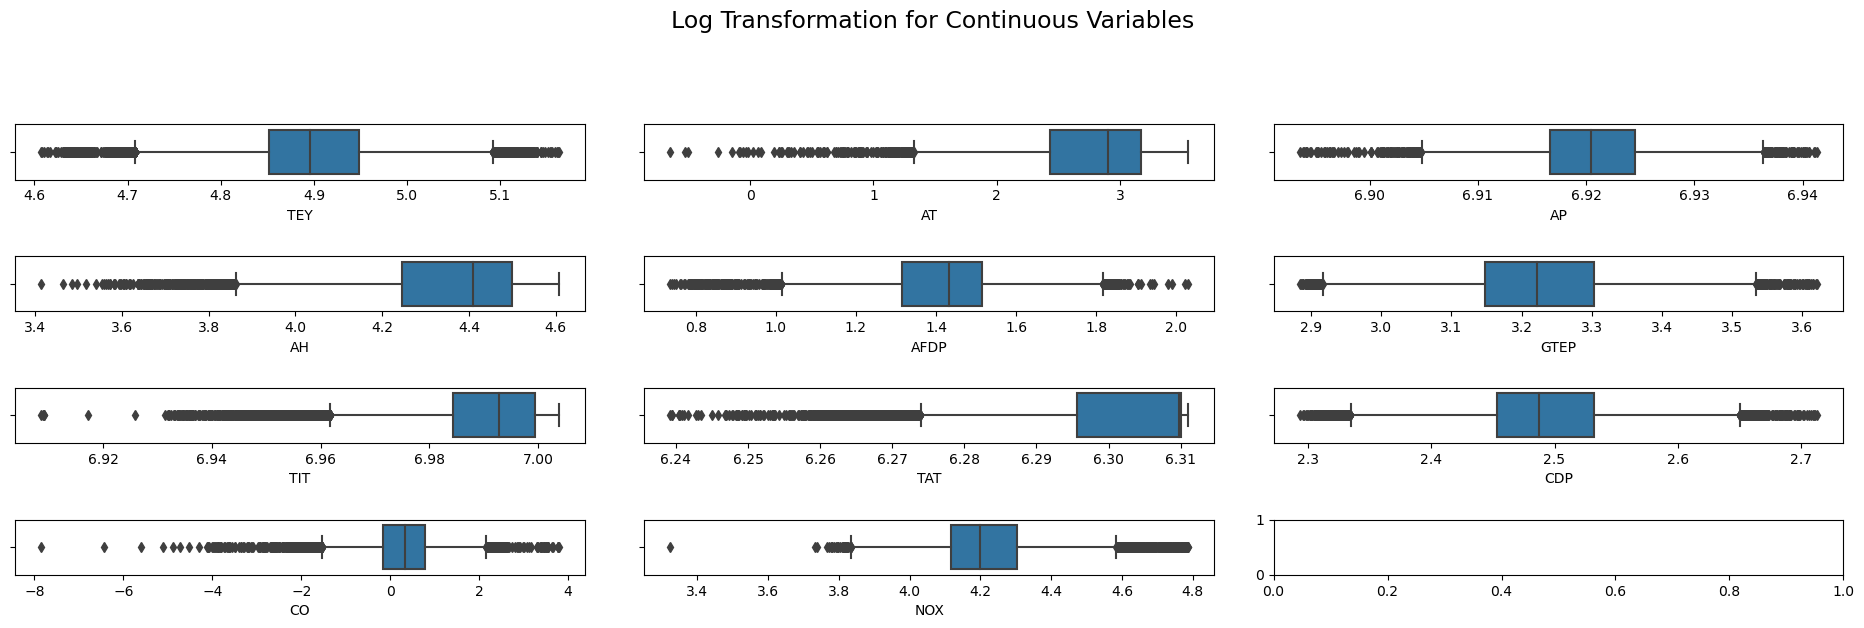

In [10]:
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.log(gas_turbines.TEY), ax=ax[0,0])
sns.boxplot(np.log(gas_turbines.AT), ax=ax[0,1])
sns.boxplot(np.log(gas_turbines.AP), ax=ax[0,2])
sns.boxplot(np.log(gas_turbines.AH), ax=ax[1,0])
sns.boxplot(np.log(gas_turbines.AFDP), ax=ax[1,1])
sns.boxplot(np.log(gas_turbines.GTEP), ax=ax[1,2])
sns.boxplot(np.log(gas_turbines.TIT), ax=ax[2,0])
sns.boxplot(np.log(gas_turbines.TAT), ax=ax[2,1])
sns.boxplot(np.log(gas_turbines.CDP), ax=ax[2,2])
sns.boxplot(np.log(gas_turbines.CO), ax=ax[3,0])
sns.boxplot(np.log(gas_turbines.NOX), ax=ax[3,1])
plt.suptitle("Log Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

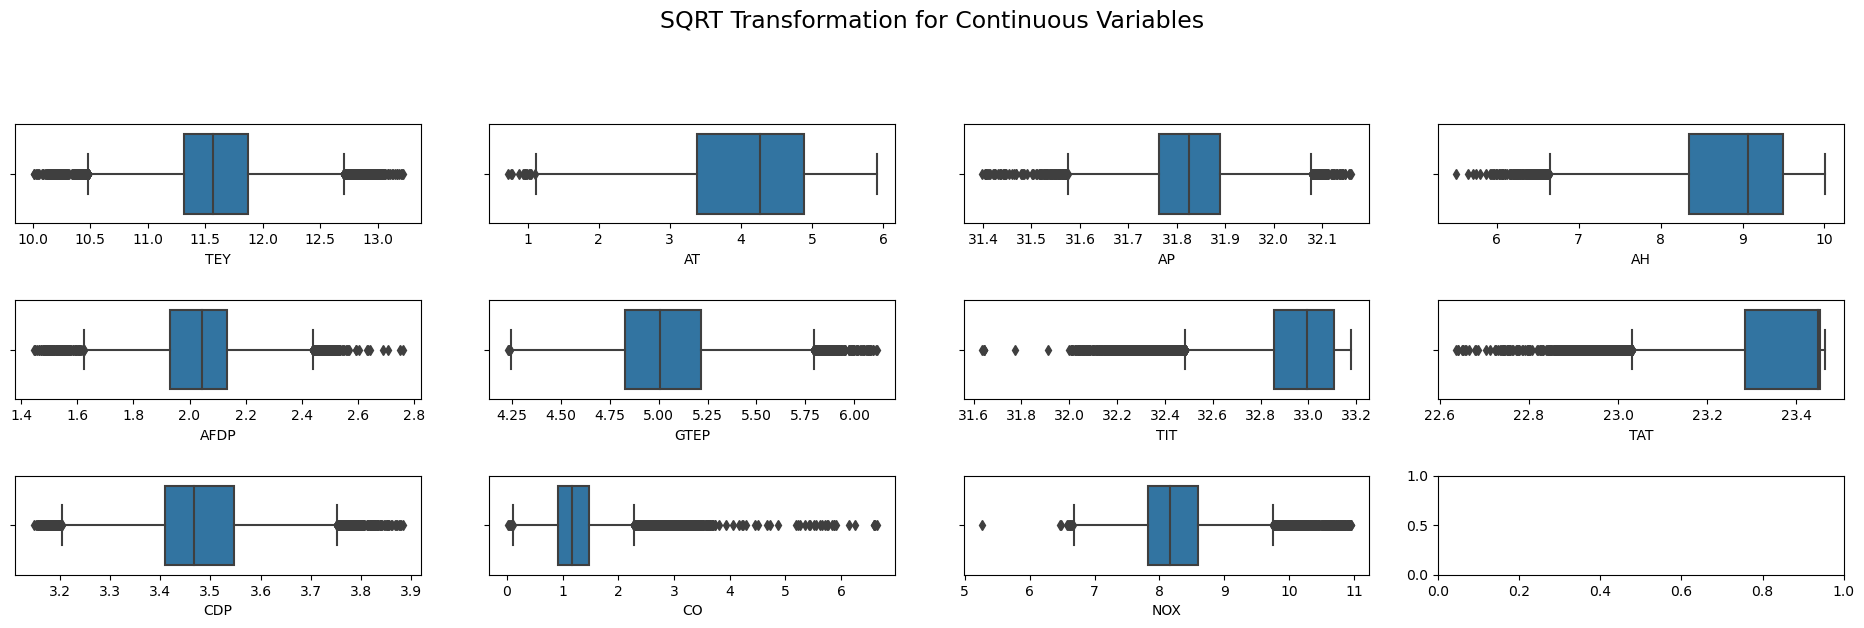

In [11]:
fig, ax=plt.subplots(3,4, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.sqrt(gas_turbines.TEY), ax=ax[0,0])
sns.boxplot(np.sqrt(gas_turbines.AT), ax=ax[0,1])
sns.boxplot(np.sqrt(gas_turbines.AP), ax=ax[0,2])
sns.boxplot(np.sqrt(gas_turbines.AH), ax=ax[0,3])
sns.boxplot(np.sqrt(gas_turbines.AFDP), ax=ax[1,0])
sns.boxplot(np.sqrt(gas_turbines.GTEP), ax=ax[1,1])
sns.boxplot(np.sqrt(gas_turbines.TIT), ax=ax[1,2])
sns.boxplot(np.sqrt(gas_turbines.TAT), ax=ax[1,3])
sns.boxplot(np.sqrt(gas_turbines.CDP), ax=ax[2,0])
sns.boxplot(np.sqrt(gas_turbines.CO), ax=ax[2,1])
sns.boxplot(np.sqrt(gas_turbines.NOX), ax=ax[2,2])
plt.suptitle("SQRT Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

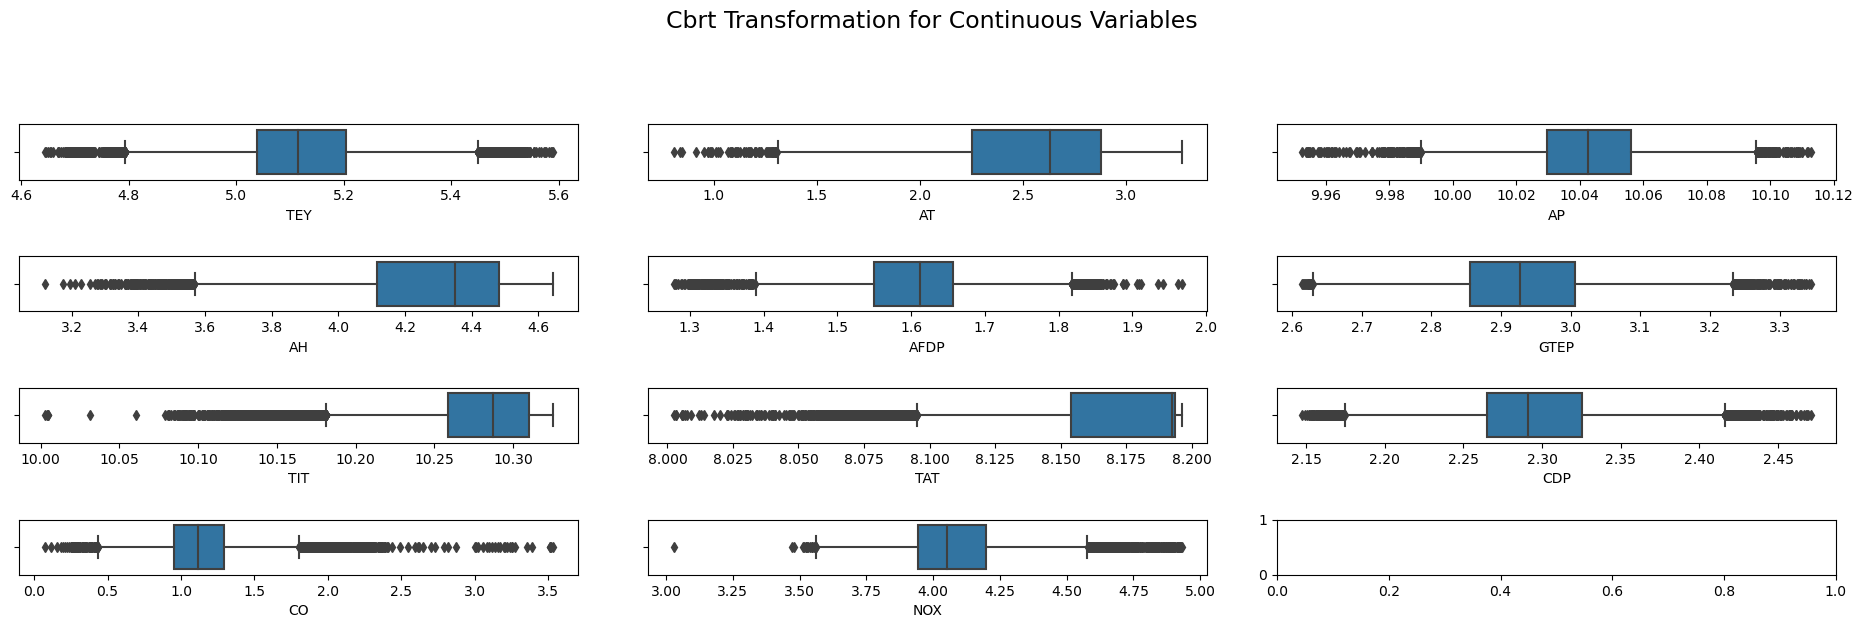

In [12]:
fig, ax=plt.subplots(4,3, figsize=(19,6), sharex= False, sharey = False)
sns.boxplot(np.cbrt(gas_turbines.TEY), ax=ax[0,0])
sns.boxplot(np.cbrt(gas_turbines.AT), ax=ax[0,1])
sns.boxplot(np.cbrt(gas_turbines.AP), ax=ax[0,2])
sns.boxplot(np.cbrt(gas_turbines.AH), ax=ax[1,0])
sns.boxplot(np.cbrt(gas_turbines.AFDP), ax=ax[1,1])
sns.boxplot(np.cbrt(gas_turbines.GTEP), ax=ax[1,2])
sns.boxplot(np.cbrt(gas_turbines.TIT), ax=ax[2,0])
sns.boxplot(np.cbrt(gas_turbines.TAT), ax=ax[2,1])
sns.boxplot(np.cbrt(gas_turbines.CDP), ax=ax[2,2])
sns.boxplot(np.cbrt(gas_turbines.CO), ax=ax[3,0])
sns.boxplot(np.cbrt(gas_turbines.NOX), ax=ax[3,1])
plt.suptitle("Cbrt Transformation for Continuous Variables", fontsize= 17, y = 1.06)
plt.tight_layout(pad=2.0)

None of the transformations are helpful to treat outliers

**Dependency of Target variable on diff Features**

In [ ]:
sns.pairplot(gas_turbines)
plt.show()

In [14]:
corr = pd.DataFrame(data=gas_turbines.corr().iloc[:,7],index=gas_turbines.columns)
corr = corr.sort_values(by='TEY',ascending=False)
corr

,TEY
TEY,1.000000
CDP,0.988473
GTEP,0.977042
TIT,0.891587
AFDP,0.717995
AP,0.146939
NOX,-0.102631
AH,-0.110272
AT,-0.207495
CO,-0.541751


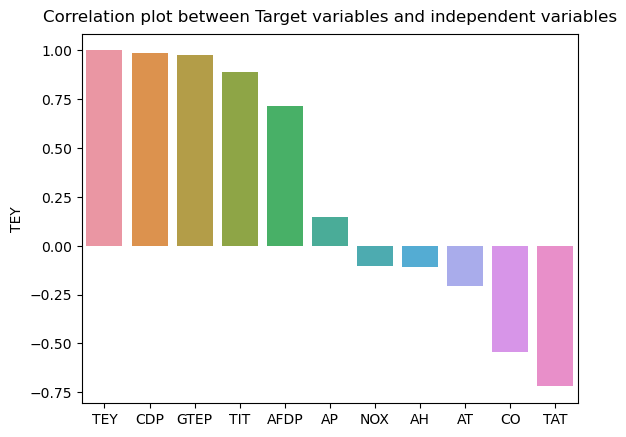

In [15]:
plt.title("Correlation plot between Target variables and independent variables", y=1.01, fontsize=12)
sns.barplot(x=corr.index,y=corr.TEY)
plt.show()

In [ ]:
plt.figure(figsize=(10,5))
sns.heatmap(gas_turbines.corr(),annot=True)
plt.xticks(rotation=45)
plt.title("Correlation Map of variables", fontsize=15)
plt.show()

In [17]:
! pip install ppscore

In [18]:
import ppscore as PPS
score = PPS.matrix(gas_turbines)
score_s = score[score['y']=='TEY']
score_sort = score_s.sort_values(by="ppscore", ascending=False)
score_sort

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
84,TEY,TEY,1.000000,predict_itself,True,None,0.000000,1.000000,None
95,CDP,TEY,0.872285,regression,True,mean absolute error,11.172076,1.426840,DecisionTreeRegressor()
51,GTEP,TEY,0.832336,regression,True,mean absolute error,11.172076,1.873154,DecisionTreeRegressor()
62,TIT,TEY,0.766040,regression,True,mean absolute error,11.172076,2.613821,DecisionTreeRegressor()
73,TAT,TEY,0.226050,regression,True,mean absolute error,11.172076,8.646631,DecisionTreeRegressor()
40,AFDP,TEY,0.152509,regression,True,mean absolute error,11.172076,9.468234,DecisionTreeRegressor()
106,CO,TEY,0.055869,regression,True,mean absolute error,11.172076,10.547906,DecisionTreeRegressor()
7,AT,TEY,0.000000,regression,True,mean absolute error,11.172076,16.007470,DecisionTreeRegressor()
18,AP,TEY,0.000000,regression,True,mean absolute error,11.172076,12.475617,DecisionTreeRegressor()
29,AH,TEY,0.000000,regression,True,mean absolute error,11.172076,16.950976,DecisionTreeRegressor()


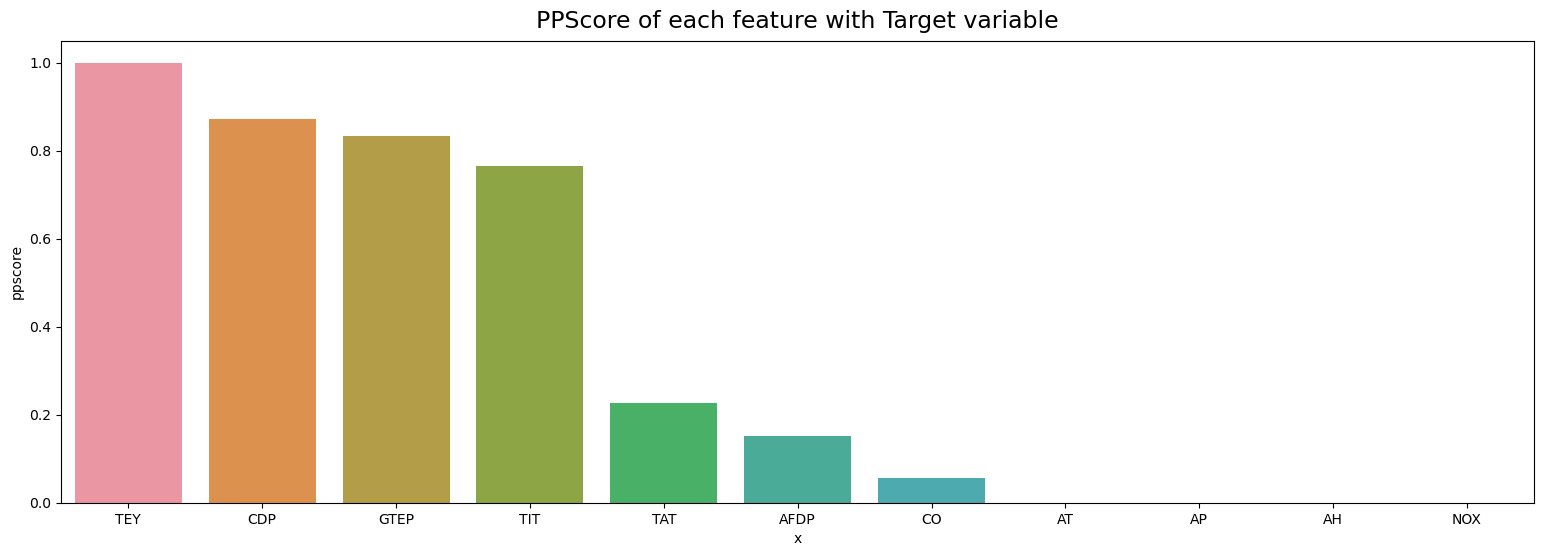

In [19]:
plt.rcParams['figure.figsize']=(19,6)
sns.barplot(x='x', y='ppscore', data=score_sort)
plt.title("PPScore of each feature with Target variable", fontsize=17, y=1.01)
plt.show()

**Observation:**

* From correlation matrix as well as ppscore we can clearly see that TEY is highly dependent on 'CDP', 'GTEP', 'TIT'.
* We can drop 'AT', 'AP', 'AH', 'NOX' as they have very less impact on dependent variables.

**Check for outliers**

In [20]:
from sklearn.ensemble import IsolationForest
data = gas_turbines.copy()

#training the model
clf = IsolationForest(random_state=10, contamination=.001)
clf.fit(data)
data['anamoly'] = clf.predict(data.iloc[:,0:11])
outliers = data[data['anamoly']==-1]
outliers

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX,anamoly
261,5.66020,1018.30,86.968,3.8404,21.079,1028.5,523.86,112.02,10.963,43.4280,99.237,-1
553,3.55320,1027.30,90.871,4.2162,21.464,1041.2,531.68,117.76,10.984,8.8254,106.840,-1
763,1.81300,1007.20,74.980,3.6967,19.958,1026.4,528.18,111.72,10.553,12.0900,114.940,-1
764,1.49880,1006.30,76.734,3.7063,20.041,1027.6,528.79,112.28,10.585,11.6520,112.830,-1
765,0.97877,1005.70,78.978,3.7379,20.084,1027.9,528.52,112.71,10.628,11.6910,108.880,-1
993,4.36570,1021.60,85.528,3.9574,20.263,1025.6,525.72,111.35,10.652,12.7860,112.270,-1
6896,17.13200,1010.80,80.503,2.2148,18.484,1034.1,539.98,102.07,10.182,11.5150,110.760,-1
7019,7.02760,997.23,97.761,2.0992,19.227,1037.2,538.53,109.63,10.338,11.0440,105.060,-1
7470,7.04730,1019.60,96.885,2.4558,19.501,1032.0,532.32,109.21,10.567,11.3740,112.230,-1
9920,15.17900,1017.60,71.630,2.7816,18.435,1027.8,533.45,103.64,10.143,12.1440,113.800,-1


**Data Preprocessing**

In [21]:
gas_turbines.shape

(15039, 11)

In [22]:
gas_turbines = gas_turbines.drop(outliers.index)
gas_turbines.shape

(15023, 11)

In [23]:
gas_turbines = gas_turbines.reset_index()
gas_turbines = gas_turbines.drop('index', axis = 1)
gas_turbines

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311
...,...,...,...,...,...,...,...,...,...,...,...
15018,9.0301,1005.6,98.460,3.5421,19.164,1049.7,546.21,111.61,10.400,4.5186,79.559
15019,7.8879,1005.9,99.093,3.5059,19.414,1046.3,543.22,111.78,10.433,4.8470,79.917
15020,7.2647,1006.3,99.496,3.4770,19.530,1037.7,537.32,110.19,10.483,7.9632,90.912
15021,7.0060,1006.8,99.008,3.4486,19.377,1043.2,541.24,110.74,10.533,6.2494,93.227


In [24]:
gas_turbines = gas_turbines.drop(['AT', 'AP', 'AH', 'NOX'], axis=1)
gas_turbines.shape

(15023, 7)

**Converting independent features into normalised and standardized data**

In [25]:
norm = MinMaxScaler()
std = StandardScaler()

gas_turbines_norm = pd.DataFrame(norm.fit_transform(gas_turbines), columns=gas_turbines.columns)          #data between -3 to +3
gas_turbines_std = pd.DataFrame(std.fit_transform(gas_turbines), columns=gas_turbines.columns)            #data between -1 to +1

**Take a smaller sample to build a model**

In [26]:
## We will take a small model as this is large data and will take huge amount of time to build model
## to randomly shuffle and select a % of data
temp = gas_turbines_std.sample(frac=1)          #shuffle all the data
temp_s = gas_turbines_std.sample(frac=0.1)      #shuffle and select only 10% of the data randomly to train
temp_s

,AFDP,GTEP,TIT,TAT,TEY,CDP,CO
5077,-0.847460,-1.159769,-1.361218,0.598312,-1.402197,-1.167321,1.257946
13506,-1.311561,-1.431602,-1.586464,0.538424,-1.410417,-1.318790,0.978412
14148,1.202559,1.813133,0.988650,-2.452128,1.861812,1.872027,-0.606130
2661,0.642637,0.744739,0.982562,-0.210807,0.834932,0.760048,-0.363147
13437,0.444150,0.851650,1.000825,-0.205710,0.791935,0.813561,-0.169738
...,...,...,...,...,...,...,...
2128,0.856523,-0.274994,-0.046266,0.557537,-0.363304,-0.243998,0.135242
359,1.353661,1.637424,0.970387,-2.111916,1.913029,1.813072,-0.674578
5703,0.238951,0.024166,0.440753,0.628893,-0.036397,0.078893,0.410908
5210,0.153791,0.109503,0.477280,0.607231,-0.000988,0.050776,-0.351822


**Splitting data into target variable and independent variables**

In [27]:
x = temp_s.drop('TEY', axis=1)
y = temp_s['TEY']
x

,AFDP,GTEP,TIT,TAT,CDP,CO
5077,-0.847460,-1.159769,-1.361218,0.598312,-1.167321,1.257946
13506,-1.311561,-1.431602,-1.586464,0.538424,-1.318790,0.978412
14148,1.202559,1.813133,0.988650,-2.452128,1.872027,-0.606130
2661,0.642637,0.744739,0.982562,-0.210807,0.760048,-0.363147
13437,0.444150,0.851650,1.000825,-0.205710,0.813561,-0.169738
...,...,...,...,...,...,...
2128,0.856523,-0.274994,-0.046266,0.557537,-0.243998,0.135242
359,1.353661,1.637424,0.970387,-2.111916,1.813072,-0.674578
5703,0.238951,0.024166,0.440753,0.628893,0.078893,0.410908
5210,0.153791,0.109503,0.477280,0.607231,0.050776,-0.351822


**Creating train and test data for model validation**

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1126, 6), (376, 6), (1126,), (376,))

In [ ]:
pip uninstall tensorflow


In [ ]:
pip install tensorflow


**Build a Model**

In [ ]:
# Importing the necessary packages
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
tf.config.experimental.list_physical_devices('GPU')               #to use GPU for faster processing of model

In [ ]:
# create model with 2 hidden layers
def create_model_two_hidden_layers():
    model = Sequential()
    model.add(Dense(5, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(10, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [ ]:
model1 = create_model_two_hidden_layers()
print("Here is the summary of the model:")
model1.summary()

In [ ]:
#create a model with 3 hidden layers
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(32, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(32, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(learning_rate=0.01)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [ ]:
model2 = create_model_three_hidden_layers()
print("Here is the summary of the model2:")
model2.summary()

In [ ]:
%%time
epochs = 500
batch_size = 50

print("Here is the summary of this model:")
model2.summary()

with tf.device('/GPU:0'):
    model2.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

In [ ]:
print("Predicted values:")
model2.predict(x_test[:10])

In [ ]:
print('Actual values')
y_test[:10]

In [ ]:
loss, mae, mse, mape = model2.evaluate(x_train, y_train)
print('\n', "Results for model 2:", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)

In [ ]:
loss, mae, mse, mape = model2.evaluate(x_test, y_test)
print('\n', "Results for model 2:", '\n', "Test Loss:", loss, '\n', "Test Mean Absolute Error:" , mae, '\n', "Test Mean Squared Error:", mse)

**Observations:**

* We got pretty good results for this model.
* Train and test errors are also quiet similar, which means our model is not overfitted or underfitted.
* Still we will try to get best results by doing hyperparameter tuning.


**Hyperparameter Tuning to get best options for:**

* batchsize
* epochs
* neurons
* learning rate
* dropout
* kernel initializer
* activation function

In [ ]:
# Create the model
# get best value for batch size and epochs by hyperparameter tuning
model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0)

# Define the grid search parameters
batch_size = [30,50,70]
epochs = [300,500,800]

# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)

# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(x_train,y_train)

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print('{},{} with: {}'.format(mean, stdev, param))

In [ ]:
#get best value for learning rate and dropuout by hyperparameter tuning

# Defining the model
%time
def create_model_three_hidden_layers(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(32,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(64,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(128,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1))
    
    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'mse', optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

In [ ]:
# Defining the model
#get best value for kernel initializer and activation func by hyperparameter tuning
%time
def create_model_three_hidden_layers(activation_function,init):
    model = Sequential()
    model.add(Dense(32,input_dim = 6,kernel_initializer = init,activation = activation_function))

    model.add(Dense(32,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(64,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(128,kernel_initializer = init,activation = activation_function))
    
    model.add(Dense(1))
    
    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

In [ ]:
# Defining the model
#get best value for neuron by hyperparameter tuning
%%time
def create_model_three_hidden_layers(neuron1,neuron2,neuron3,neuron4):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 6,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron3,input_dim = neuron2,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(neuron4,input_dim = neuron3,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dense(1))
    
    adam = Adam(lr = 0.001)
    model.compile(loss = 'mse',optimizer = adam,metrics = ['mse', 'mae', 'mape'])
    return model

# Create the model

model = KerasRegressor(build_fn = create_model_three_hidden_layers,verbose = 0,batch_size = 70,epochs = 300)

# Define the grid search parameters

neuron1 = [8,16,32]
neuron2 = [32,64,128]
neuron3 = [32,64,128]
neuron4 = [32,64,128]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2, neuron3 = neuron3, neuron4 = neuron4)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 0)
grid_result = grid.fit(x_train,y_train)

In [ ]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

In [ ]:
#create a model with 3 hidden layers with best hyperparameters
def create_model_three_hidden_layers():
    model = Sequential()
    model.add(Dense(8, input_dim=6, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(64, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(128, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1))
    
    adam=Adam(lr=0.001)
    model.compile(loss='mse', optimizer=adam, metrics=['mse', 'mae', 'mape'])
    return model

In [ ]:
%%time
epochs=300
batch_size=70

final_model=create_model_three_hidden_layers()

print("Here is the summary of our final model:")
final_model.summary()

with tf.device('/GPU:0'):
  final_model.fit(x_train,y_train, verbose = 0,batch_size = batch_size,epochs = epochs, shuffle=True)

In [ ]:
loss, mae, mse, mape = final_model.evaluate(x_train, y_train)
print('\n', "Results for final model :", '\n', "Training Loss:", loss, '\n', "Training Mean Absolute Error:" , mae, '\n', "Training Mean Squared Error:", mse)

In [ ]:
loss_t, mae_t, mse_t, mape_t = final_model.evaluate(x_test, y_test)
print('\n', "Results for final model :", '\n', "Test Loss:", loss_t, '\n', "Test Mean Absolute Error:" , mae_t, '\n', "Test Mean Squared Error:", mse_t)

**Predicting values from Model using same dataset**

In [ ]:
# generating predictions for test data
y_predict_test = model.predict(x_test) 

# creating table with test price & predicted price for test
predictions_df = pd.DataFrame(x_test)
predictions_df['Actual'] = y_test
predictions_df['Predicted'] = y_predict_test
print(predictions_df.shape)
predictions_df.head(10)

In [ ]:
plt.figure(figsize=(12,8))
plt.xlabel("Actual Values")
plt.ylabel("Predicted values")
plt.title("The Scatterplot of Relationship between Actual Values and Predictions")
plt.scatter(predictions_df['Actual'], predictions_df['Predicted'])